#   EQUIVALENCE TRIPS TO PATHS FOR CASE CS10.PP00.SO00

TOC:

[1. Download and format trips](#1.-download-and-format-trips)

[2. Download and format itineraries](#2.-download-and-format-itineraries)

[3. Assign trips to paths and analyse the results of the assignation](#3.-assign-trips-to-paths-and-analyse-the-results-of-the-assignation)

[4. Download and format itineraries with 2 connections](#4.-download-and-format-itineraries-with-2-connections)

[5. Assign trips to paths and analyse the results of the assignation](#5.-assign-trips-to-paths-and-analyse-the-results-of-the-assignation)



In [1]:
# libraries to import
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ast import literal_eval
from typing import Dict
import os
print(os.getcwd())
os.chdir(r"C:\Users\LMENENDEZ\GitHub\MultiModX")
print(os.getcwd())
pd.set_option('display.max_columns', None)

c:\Users\LMENENDEZ\GitHub\MultiModX\notebooks\CS10
C:\Users\LMENENDEZ\GitHub\MultiModX


In [2]:
%load_ext autoreload

In [3]:
%autoreload
from strategic_evaluator.logit_model import *
from script.trips_format import *

## 1. Download and format trips

In [4]:
all_trips = pd.read_csv(
    r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP4 Performance Assessment Solution\Demand data\Matrices MITMA\with_archetypes\20220922_28_trip_matrix_arc_pt_processed.csv.gz",
    compression="gzip",
    sep="|"
)

In [5]:
#Here there is no trip id but later trip id appears all the time
trips = all_trips[all_trips["date"] == 20220923].reset_index(drop=True).rename(columns={"origin_nut": "origin", "destination_nut": "destination"})
trips.head()

,date,trip_period,origin_zone,origin,origin_name,destination_zone,destination,destination_name,entry_point,exit_point,origin_purpose,destination_purpose,distance,route_distance,duration,mode,service,legs,trip_vehicle_type,nationality,home_census,home_zone,overnight_census,income,age,sex,vehicle_type,short_professional_driver,trips,trips_km,sample_trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,n_legs,mode_sequence,node_sequence,start_node,end_node,type,road_legs,train_legs,plane_legs,node_sequence_reduced,start_node_reduced,end_node_reduced
0,20220923,P00,01002,ES211,Álava,4802006,ES213,Vizcaya,NaN,NaN,NF,O,D04_[10000-50000),D04_[10000-50000),01-02,train,conv_unknown,P00*01002*01002*None*train_13121*00-01*road*No...,other,ES,2_48,4801303,2_48,I01_[10000-15000),A01_[25-45),male,passenger,False,4.135,139.516,1.0,0.000000,0.000000,2.067500,2.067500,0.000000,0.000000,3,road-train-road,train_13121-train_13200,train_13121,train_13200,national,2,1,0,train_13121-train_13200,train_13106,train_13200
1,20220923,P00,01009_AM,ES211,Álava,31010_AM,ES220,Navarra,NaN,NaN,O,H,D04_[10000-50000),D04_[10000-50000),00-01,train,conv_unknown,P00*01009_AM*01009_AM*None*train_11213*00-01*r...,other,ES,2_31,31010_AM,2_31,I01_[10000-15000),A01_[25-45),male,passenger,False,5.191,69.312,1.0,3.707857,0.000000,0.000000,0.494381,0.000000,0.988762,3,road-train-road,train_11213-train_11300,train_11213,train_11300,national,2,1,0,train_11213-train_11300,train_13106,train_11300
2,20220923,P00,01009_AM,ES211,Álava,abroad_208,abroad,abroad,NaN,ground_Fra_08,NF,NF,abroad,D05_[50000-inf),01-02,train,conv_unknown,P00*01009_AM*01009_AM*None*train_11213*00-01*r...,other,FR,NaN,NaN,NaN,NaN,NaN,NaN,passenger,False,1.599,309.588,1.0,0.888333,0.399750,0.142133,0.071067,0.062183,0.035533,3,road-train-road,train_11213-train_11600,train_11213,train_11600,international_D,2,1,0,train_11213-train_11600,train_11208,train_11511
3,20220923,P00,01036,ES211,Álava,4802006,ES213,Vizcaya,NaN,NaN,H,O,D04_[10000-50000),D04_[10000-50000),00-01,train,conv_unknown,P00*01036*01036*None*train_13106*00-01*road*No...,other,ES,2_01,01036,2_48,I02_[15000-inf),A02_[45-65),female,passenger,False,6.236,139.477,1.0,3.118000,0.000000,0.779500,1.559000,0.779500,0.000000,3,road-train-road,train_13106-train_13200,train_13106,train_13200,national,2,1,0,train_13106-train_13200,train_13106,train_13200
4,20220923,P00,0105902,ES211,Álava,09219,ES412,Burgos,NaN,NaN,O,NF,D04_[10000-50000),D04_[10000-50000),01-02,train,conv_unknown,P00*0105902*0105901*None*train_11208*00-01*roa...,other,ES,2_01,0105904,2_01,I02_[15000-inf),A02_[45-65),male,passenger,False,4.215,155.813,1.0,3.417568,0.113919,0.227838,0.227838,0.227838,0.000000,3,road-train-road,train_11208-train_11200,train_11208,train_11200,national,2,1,0,train_11208-train_11200,train_11208,train_11200


In [6]:
#associates each airport to the corresponding new NUTS
airports_to_NUTS={"airport_LPA":("ES705","Gran Canaria"),
                 "airport_FUE":("ES704","Fuerteventura"),
                 "airport_ACE":("ES708","Lanzarote"),
                 "airport_TFS":("ES709","Tenerife"),
                 "airport_TFN":("ES709","Tenerife"),
                 "airport_GMZ":("ES709","Tenerife"),
                 "airport_SPC":("ES707","La Palma"),
                 "airport_VDE":("ES703","El Hierro"),
                 "airport_PMI":("ES532","Mallorca"),
                 "airport_IBZ":("ES531","Eivissa i Formentera"),
                 "airport_MAH":("ES533","Menorca")}

In [7]:
trips=format_trips(trips, airports_to_NUTS)

17 columns were removed


We will remove:
- all the trips that come from or go to abroad
- the trips that go to Mad/Guadalajara because most likely these are cercanías
- all the trips containing weird stations

In [8]:
trips=trips[((trips["origin"].str.startswith("ES"))&(trips["destination"].str.startswith("ES")))]

In [9]:
trips=trips[~((trips["origin_zone"].str.strip().str.lower().str.startswith("abroad"))|(trips["destination_zone"].str.strip().str.lower().str.startswith("abroad")))]

In [10]:
trips=trips[~(((trips["origin"]=="ES424")&(trips["destination"]=="ES300"))|((trips["origin"]=="ES300")&(trips["destination"]=="ES424")))]

In [11]:
stops_loc=pd.read_csv(r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP3 Scenario definition\Case study input data\Spain\CS10\v=0.10\gtfs_es_UIC_v1.0\stops.txt").astype("str")
stops_loc["stop_id"] = stops_loc["stop_id"].apply(lambda x: "00" + x)

In [12]:
trips.loc[:,"weird_stations"] = trips["node_sequence_reduced"].apply(
    lambda x: find_weird_stations(x, stops_loc))

In [13]:
unique_weird_stations=get_weird_stations(trips["weird_stations"])

In [14]:
MobA_stations_coord=gpd.read_file(r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP3 Scenario definition\Case study input data\Spain+abroad\v=0.1\datos moba\train_stations\train_stations.shp")

In [15]:
# identifies all the un-localisable stations
nowhere_stations=set(unique_weird_stations)-set(MobA_stations_coord["ID"])
print(f"there are {len(nowhere_stations)} stations that are not in the data provided by MobA but appear in the trips dataframe")

there are 199 stations that are not in the data provided by MobA but appear in the trips dataframe


In [16]:
trips = trips[~trips["node_sequence_reduced"].apply(lambda x: any(station in x for station in nowhere_stations))]

Now we have to construct a MMX path for each trip

In [17]:
# construct a dictionary with the equivalence between IATA and ICAO codes
airports=pd.read_csv(r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP3 Scenario definition\Case study input data\Spain\CS10\v=0.10\infrastructure\airports_info\IATA_ICAO_Airport_codes_v1.3.csv")
airports["ICAO"] = airports["ICAO"].fillna(airports["IATA"])
IATA_to_ICAO = airports.set_index("IATA")["ICAO"].to_dict()

In [18]:
# coordinates, geometry and other properties of all NUTS (in Europe?)
NUTS_coord=gpd.read_file(r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP4 Performance Assessment Solution\Demand data\nuts3_2003_geom_10.gpkg")

In [19]:
# list of stations considered in MMX
train_stations_considered=pd.read_csv(r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP3 Scenario definition\Case study input data\Spain\CS10\v=0.10\infrastructure\rail_info\rail_stations_considered_GTFS_2022v0.1.csv").astype(str)
train_stations_considered["stop_id"] = train_stations_considered["stop_id"].apply(lambda x: "00" + x) #to make they start with 00

In [20]:
# align coordinate reference system (crs)
NUTS_coord = NUTS_coord.to_crs(MobA_stations_coord.crs)

# Perform a spatial join to find which NUTS region each station belongs to
spatial_join = gpd.sjoin(MobA_stations_coord, NUTS_coord, how="left", predicate="within")

# Construct the dictionary
station_to_NUTS = dict(zip(spatial_join["ID"], spatial_join["geocode"]))

In [21]:
train_stations_considered=format_train_stations_considered(train_stations_considered,station_to_NUTS)

In [22]:
# list of all MMX stations
train_station_MMX=train_stations_considered["stop_id"].tolist()

In [23]:
trips.head()

,date,origin_zone,origin,origin_name,destination_zone,destination,destination_name,entry_point,exit_point,origin_purpose,destination_purpose,legs,nationality,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,n_legs,mode_sequence,node_sequence,start_node,end_node,type,road_legs,train_legs,plane_legs,node_sequence_reduced,start_node_reduced,end_node_reduced,mode_tp,trips,weird_stations
0,20220923,01001,ES211,Álava,20063,ES212,Guipúzcoa,NaN,NaN,H,NF,P06*01001*01001*None*train_11210*00-01*road*No...,ES,3.582000,0.0000,0.000000,0.000000,0.000000,0.000000,3,road-train-road,train_11210-train_11600,train_11210,train_11600,national,2,1,0,train_11210-train_11600,train_13106,train_11511,['rail'],3.582,[]
1,20220923,01001,ES211,Álava,28106,ES300,Madrid,NaN,NaN,NF,O,P14*01001*01051*None*train_11212*00-01*road*No...,ES,2.617719,0.0000,0.121754,0.213070,0.182632,0.334825,4,road-train-train-road,train_11212-train_11200-train_10000,train_11212,train_10000,national,2,2,0,train_11212-train_11200-train_10000,train_13106,train_18000,"['rail', 'rail']",3.470,[]
2,20220923,01001,ES211,Álava,31088,ES220,Navarra,NaN,NaN,H,NF,P20*01001*01001*None*train_11210*00-01*road*No...,ES,2.058750,0.2745,0.137250,0.686250,0.137250,0.000000,3,road-train-road,train_11210-train_80100,train_11210,train_80100,national,2,1,0,train_11210-train_80100,train_13106,train_80100,['rail'],3.294,[]
3,20220923,01001,ES211,Álava,31902,ES220,Navarra,NaN,NaN,O,W,P13*01001*01001*None*train_11210*00-01*road*No...,ES,3.064286,0.0000,0.000000,0.408571,0.000000,0.817143,3,road-train-road,train_11210-train_80100,train_11210,train_80100,national,2,1,0,train_11210-train_80100,train_11208,train_80100,['rail'],4.290,[]
4,20220923,01001,ES211,Álava,31908_AM,ES220,Navarra,NaN,NaN,NF,NF,P11*01001*01001*None*train_11210*00-01*road*No...,ES,3.767826,0.0000,0.000000,0.000000,0.565174,0.000000,3,road-train-road,train_11210-train_80005,train_11210,train_80005,national,2,1,0,train_11210-train_80005,train_11208,train_81202,['rail'],4.333,[]


In [24]:
trips=process_node_sequence_MMX(trips,train_station_MMX,IATA_to_ICAO)

## 2. Download and format itineraries

In [25]:
possible_itineraries=pd.read_csv(r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP3 Scenario definition\Case study input data\Spain\CS10\v=0.10\processed_cs10.pp00.so00_c1\paths_itineraries\possible_itineraries_0.csv")

In [26]:
possible_itineraries.columns

Index(['origin', 'destination', 'option', 'nservices', 'path',
       'total_travel_time', 'total_cost', 'total_emissions',
       'total_waiting_time', 'nmodes', 'journey_type', 'access_time',
       'egress_time', 'service_id_0', 'origin_0', 'destination_0',
       'provider_0', 'alliance_0', 'mode_0', 'departure_time_0',
       'arrival_time_0', 'travel_time_0', 'cost_0', 'service_cost_0',
       'emissions_cost_0', 'emissions_0', 'service_id_1', 'origin_1',
       'destination_1', 'provider_1', 'alliance_1', 'mode_1',
       'departure_time_1', 'arrival_time_1', 'travel_time_1', 'mct_time_0_1',
       'connecting_time_0_1', 'waiting_time_0_1', 'cost_1', 'service_cost_1',
       'emissions_cost_1', 'emissions_1'],
      dtype='object')

In [27]:
possible_itineraries=format_itineraries(possible_itineraries)

In [28]:
possible_itineraries

,origin,destination,path,nmodes,mode_tp,access_time,egress_time,travel_time_0,cost_0,emissions_0,travel_time_1,mct_time_0_1,cost_1,emissions_1,total_travel_time,total_cost,total_emissions
0,ES111,ES112,"['007131412', '007120300']",1,['rail'],43.0,74.0,179.500000,10.890000,3.410000,NaN,NaN,NaN,NaN,296.500000,10.890000,3.410000
1,ES111,ES112,"['007131412', '007122100', '007120300']",1,"['rail', 'rail']",43.0,74.0,67.882353,11.090000,3.470000,46.352941,10.0,3.360000,1.05000,241.235294,14.450000,4.520000
2,ES111,ES112,"['007131412', '007131400']",1,['rail'],43.0,101.0,29.000000,5.070000,1.590000,NaN,NaN,NaN,NaN,173.000000,5.070000,1.590000
3,ES111,ES113,"['007131400', '007122100']",1,['rail'],61.0,28.0,42.733333,7.400000,2.320000,NaN,NaN,NaN,NaN,131.733333,7.400000,2.320000
4,ES111,ES113,"['007131400', '007123004', '007122100']",1,"['rail', 'rail']",61.0,28.0,46.500000,4.670000,1.460000,74.500000,20.0,5.850000,1.83000,230.000000,10.520000,3.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26726,ES709,ES705,"['GCXO', 'GCRR', 'GCLP']",1,"['air', 'air']",120.0,57.0,50.000000,119.156500,51.910000,45.000000,45.0,108.466000,45.24000,317.000000,227.622500,97.150000
26727,ES709,ES708,"['GCTS', 'GCLP', 'GCRR']",1,"['air', 'air']",164.0,43.0,35.000000,89.585500,44.370000,45.000000,25.0,108.466000,45.24000,312.000000,198.051500,89.610000
26728,ES709,ES708,"['GCXO', 'GCLA', 'GCRR']",1,"['air', 'air']",120.0,43.0,30.000000,94.765500,44.370000,70.000000,20.0,138.296500,65.91000,283.000000,233.062000,110.280000
26729,ES709,ES708,"['GCXO', 'GCLP', 'GCRR']",1,"['air', 'air']",120.0,43.0,30.000000,88.149563,43.263750,44.687500,25.0,108.431687,45.01125,262.687500,196.581250,88.275000


## 3. Assign trips to paths and analyse the results of the assignation

In [29]:
trips=trips.rename({"node_sequence_MMX":"path"},axis=1)

In [30]:
trips.shape[0]

127998

In [31]:
trips_w_costs=trips.merge(possible_itineraries, on=["path","origin","destination"],how="left")

In [44]:
trips_w_costs=trips_w_costs[trips_w_costs["nmodes"].notna()]

In [45]:
trips_w_costs

,date,origin_zone,origin,origin_name,destination_zone,destination,destination_name,entry_point,exit_point,origin_purpose,destination_purpose,legs,nationality,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,n_legs,mode_sequence,node_sequence,start_node,end_node,type,road_legs,train_legs,plane_legs,node_sequence_reduced,start_node_reduced,end_node_reduced,mode_tp_x,trips,weird_stations,path,nmodes,mode_tp_y,access_time,egress_time,travel_time_0,cost_0,emissions_0,travel_time_1,mct_time_0_1,cost_1,emissions_1,total_travel_time,total_cost,total_emissions
6,20220923,01002,ES211,Álava,0313903,ES521,Alicante / Alacant,NaN,NaN,H,NF,P07*01002*48904_AM*None*airport_BIO*01-02*road...,ES,3.565333,0.000000,0.000000,0.594222,0.594222,0.594222,3,road-plane-road,airport_BIO-airport_ALC,airport_BIO,airport_ALC,national,2,0,1,airport_BIO-airport_ALC,airport_BIO,airport_ALC,['air'],5.348,[],"['LEBB', 'LEAL']",1.0,['air'],146.0,72.0,80.0,153.862000,49.280000,NaN,NaN,NaN,NaN,298.0,153.862000,49.280000
7,20220923,01002,ES211,Álava,0801902,ES511,Barcelona,NaN,NaN,W,NF,P15*01002*0105901*None*train_11208*00-01*road*...,ES,3.330183,0.181646,0.605488,0.302744,0.363293,0.181646,3,road-train-road,train_11208-train_71801,train_11208,train_71801,national,2,1,0,train_11208-train_71801,train_11208,train_71801,['rail'],4.965,[],"['007111208', '007171801']",1.0,['rail'],24.0,36.0,309.0,45.270000,12.440000,NaN,NaN,NaN,NaN,369.0,45.270000,12.440000
8,20220923,01002,ES211,Álava,0905903,ES412,Burgos,NaN,NaN,NF,O,P13*01002*01036*None*train_13106*00-01*road*No...,ES,3.543867,0.000000,0.063283,0.000000,0.189850,0.000000,3,road-train-road,train_13106-train_11014,train_13106,train_11014,national,2,1,0,train_13106-train_11014,train_13106,train_11014,['rail'],3.797,[],"['007113106', '007111014']",1.0,['rail'],53.0,27.0,128.0,9.570000,3.000000,NaN,NaN,NaN,NaN,208.0,9.570000,3.000000
9,20220923,01002,ES211,Álava,0905909,ES412,Burgos,NaN,NaN,H,NF,P22*01002*01036*None*train_13106*00-01*road*No...,ES,4.125600,0.000000,0.305600,0.152800,0.000000,0.764000,3,road-train-road,train_13106-train_11014,train_13106,train_11014,national,2,1,0,train_13106-train_11014,train_13106,train_11014,['rail'],5.348,[],"['007113106', '007111014']",1.0,['rail'],53.0,27.0,128.0,9.570000,3.000000,NaN,NaN,NaN,NaN,208.0,9.570000,3.000000
190,20220923,01004_AM,ES211,Álava,07050,ES531,Eivissa i Formentera,NaN,NaN,H,NF,P17*01004_AM*48904_AM*None*airport_BIO*00-01*r...,ES,1.833500,0.000000,0.000000,0.916750,0.916750,0.000000,3,road-plane-road,airport_BIO-airport_IBZ,airport_BIO,airport_IBZ,national,2,0,1,airport_BIO-airport_IBZ,airport_BIO,airport_IBZ,['air'],3.667,[],"['LEBB', 'LEIB']",1.0,['air'],146.0,51.0,90.0,156.240000,56.000000,NaN,NaN,NaN,NaN,287.0,156.240000,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127524,20220923,PT300,ES709,Tenerife,3500402,ES708,Lanzarote,airport_TFN,NaN,NF,NF,P07*PT300*3802304*None*airport_TFN*00-01*plane...,ES,1.410500,1.989167,1.193500,0.054250,0.090417,0.036167,3,plane-plane-road,airport_TFN-airport_ACE,airport_TFN,airport_ACE,international_O,1,0,2,airport_TFN-airport_ACE,airport_TFN,airport_ACE,"['air', 'air']",4.774,[],"['GCXO', 'GCRR']",1.0,['air'],120.0,43.0,50.0,119.102962,51.553077,NaN,NaN,NaN,NaN,213.0,119.102962,51.553077
127526,20220923,PT300,ES709,Tenerife,3501601,ES705,Gran Canaria,airport_TFN,NaN,NF,NF,P06*PT300*3802304*None*airport_TFN*00-01*plane...,ES,0.738776,1.080459,0.738776,0.036939,0.083112,0.036939,3,plane-plane-road,airport_TFN-airport_LPA,airport_TFN,airport_LPA,international_O,1,0,2,airport_TFN-airport_LPA,airport_TFN,airport_LPA,"['air', 'air']",2.715,[],"['GCXO', 'GCLP']",1.0,['air'],120.0,57.0,30.0,88.205638,43.637586,NaN,NaN,NaN,NaN,207.0,88.205638,43.637586
127527,20220923,PT300,ES709,Tenerife,3501802,ES708,Lanzarote,airport_TFN,NaN,NF,H,P06*PT300*3802304*N

In [46]:
num_trips=trips["trips"].sum()
num_assigned=trips_w_costs[trips_w_costs["path"].notna()]["trips"].sum()
print(f"we assigned {num_assigned/num_trips*100:.2f}% of the trips")

we assigned 47.21% of the trips


In [47]:
trips_logit =trips_w_costs.groupby(['origin', 'destination', 'path']).agg({  
    'trips': 'sum',    # Sum num_of_trips
    'archetype_0': 'sum',     # Sum archetype_0
    'archetype_1': 'sum',     # Sum archetype_1
    'archetype_2': 'sum',     # Sum archetype_2
    'archetype_3': 'sum',     # Sum archetype_3
    'archetype_4': 'sum',     # Sum archetype_4
    'archetype_5': 'sum',     # Sum archetype_5
    'nmodes': 'first',        # Keep the first value for nmodes
    'access_time': 'first',   # Keep the first value for access_time
    'egress_time': 'first',    # Keep the first value for egress_time
    'travel_time_0': 'first',
    'cost_0': 'first',
    'emissions_0':'first',
    'mct_time_0_1': 'first',
    'travel_time_1': 'first',
    'cost_1': 'first',
    'emissions_1':'first',
    #'mct_time_1_2': 'first',
    #'travel_time_2': 'first',
    #'cost_2': 'first',
    #'emissions_2':'first',
    'total_travel_time': 'first',
    'total_cost':'first',
    'total_emissions':'first'
}).reset_index()

Note that when doing this we are removing all the trips that have path==NaN

In [48]:
trips_logit["trips"].sum()

np.float64(240055.254)

In [49]:
trips_w_costs[trips_w_costs["path"].notna()]["trips"].sum()

np.float64(240055.25400000002)

In [37]:
trips["trips"].sum()

np.float64(508441.81299999997)

In [51]:
trips_logit.to_csv("trips_logit_CS10.csv",index=False)

## 4. download and format itineraries with 2 connections

In [25]:
possible_itineraries_2_conn=pd.read_csv(r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP3 Scenario definition\Case study input data\Spain\CS10\v=0.10\processed_cs10.pp00.so00_2conn\paths_itineraries\possible_itineraries_0.csv")

In [26]:
possible_itineraries_2_conn=format_itineraries(possible_itineraries_2_conn)

## 5. Assign trips to paths and analyse the results of the assignation

In [27]:
trips=trips.rename({"node_sequence_MMX":"path"},axis=1)

In [28]:
trips.shape[0]

127998

In [29]:
trips_w_costs=trips.merge(possible_itineraries_2_conn, on=["path","origin","destination"],how="left")

In [30]:
trips_w_costs.shape[0]

127998

In [31]:
trips_w_costs=trips_w_costs[trips_w_costs["nmodes"].notna()]

In [32]:
num_trips=trips["trips"].sum()
num_assigned=trips_w_costs[trips_w_costs["path"].notna()]["trips"].sum()
print(f"we assigned {num_assigned/num_trips*100:.2f}% of the trips")

we assigned 47.21% of the trips


In [33]:
trips_logit =trips_w_costs.groupby(['origin', 'destination', 'path']).agg({  
    'trips': 'sum',    # Sum num_of_trips
    'archetype_0': 'sum',     # Sum archetype_0
    'archetype_1': 'sum',     # Sum archetype_1
    'archetype_2': 'sum',     # Sum archetype_2
    'archetype_3': 'sum',     # Sum archetype_3
    'archetype_4': 'sum',     # Sum archetype_4
    'archetype_5': 'sum',     # Sum archetype_5
    'nmodes': 'first',        # Keep the first value for nmodes
    'access_time': 'first',   # Keep the first value for access_time
    'egress_time': 'first',    # Keep the first value for egress_time
    'travel_time_0': 'first',
    'cost_0': 'first',
    'emissions_0':'first',
    'mct_time_0_1': 'first',
    'travel_time_1': 'first',
    'cost_1': 'first',
    'emissions_1':'first',
    'mct_time_1_2': 'first',
    'travel_time_2': 'first',
    'cost_2': 'first',
    'emissions_2':'first',
    'total_travel_time': 'first',
    'total_cost':'first',
    'total_emissions':'first'
}).reset_index()

In [34]:
trips_logit.to_csv("trips_logit_CS10_2_conn.csv",index=False)

In [35]:
trips_logit[trips_logit["path"].notna()].sample(10)

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions
418,ES213,ES618,"['LEBB', 'LEZL']",286.240,206.580084,4.022728,7.820028,31.184479,25.370312,11.262369,1.0,101.0,44.0,82.500000,155.29,59.435000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.500000,155.29,59.435000
2579,ES709,ES300,"['GCTS', 'LEMD']",400.958,241.383492,11.929664,9.390994,76.277307,34.488485,27.488058,1.0,164.0,63.0,168.333333,216.89,111.456667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395.333333,216.89,111.456667
951,ES416,ES532,"['LEMD', 'LEPA']",4.563,2.737800,0.547560,0.000000,0.547560,0.365040,0.365040,1.0,202.0,79.0,85.000000,142.40,48.228750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366.000000,142.40,48.228750
1190,ES425,ES421,"['007160300', '007160600']",7.999,6.833311,0.049798,0.025392,0.500996,0.279760,0.309743,1.0,98.0,20.0,84.000000,13.44,4.210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.000000,13.44,4.210000
611,ES300,ES111,"['007117000', '007131412']",305.522,211.458661,8.685132,9.337820,32.919605,18.809294,24.311489,1.0,32.0,36.0,230.000000,53.35,14.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.000000,53.35,14.660000
679,ES300,ES421,"['007117000', '007160600']",212.793,183.698443,1.160338,2.795829,8.298650,8.264516,8.575224,1.0,32.0,20.0,108.214286,21.00,6.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.214286,21.00,6.580000
936,ES416,ES412,"['007108004', '007111014']",13.402,11.628106,0.086127,0.000000,1.214072,0.258380,0.215316,1.0,41.0,27.0,84.666667,15.40,4.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.666667,15.40,4.820000
1756,ES523,ES421,"['007165000', '007160600']",340.477,263.009151,7.659788,5.389774,26.877883,19.429703,18.110700,1.0,33.0,20.0,131.666667,12.68,3.970000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.666667,12.68,3.970000
251,ES130,ES521,"['LEXJ', 'LEMD', 'LEAL']",5.942,1.980667,0.000000,0.000000,0.990333,0.000000,2.971000,1.0,106.0,72.0,66.666667,118.81,47.910000,47.0,65.0,122.77,55.04,NaN,NaN,NaN,NaN,356.666667,241.58,102.950000
968,ES418,ES114,"['007108240', '007122100']",6.867,4.245708,0.131827,0.205186,1.156302,0.366429,0.761548,1.0,54.0,91.0,123.666667,25.13,7.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268.666667,25.13,7.870000


In [36]:
trips_logit[trips_logit["nmodes"].isna()]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions


## 6. Download the itineraries cluster pareto from the last version

In [25]:
itineraries_cp=pd.read_csv(r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP3 Scenario definition\Case study input data\Spain\CS10\v=0.13\processed_cs10.pp00.so00_c1\paths_itineraries\possible_itineraries_clustered_pareto_0.csv")

In [26]:
possible_itineraries=pd.read_csv(r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP3 Scenario definition\Case study input data\Spain\CS10\v=0.13\processed_cs10.pp00.so00_c1\paths_itineraries\possible_itineraries_0.csv")

In [27]:
#we remove things that have no modes
itineraries_cp=itineraries_cp[itineraries_cp["journey_type"]!="none"]
possible_itineraries=possible_itineraries[possible_itineraries["journey_type"]!="none"]

In [28]:
selected_od_pairs=pd.DataFrame({"origin":["ES300","ES511","ES618","ES523","ES617","ES213","ES300","ES111","ES521","ES241","ES617","ES300","ES431","ES511"],
                               "destination":["ES511","ES300","ES523","ES618","ES213","ES617","ES111","ES300","ES241","ES521","ES300","ES617","ES511","ES431"]})

In [29]:
selected_od_pairs

,origin,destination
0,ES300,ES511
1,ES511,ES300
2,ES618,ES523
3,ES523,ES618
4,ES617,ES213
5,ES213,ES617
6,ES300,ES111
7,ES111,ES300
8,ES521,ES241
9,ES241,ES521


In [30]:
trips_small=pd.merge(left=selected_od_pairs,right=trips,on=["origin","destination"],how="left")

In [31]:
# we remove trips with no path
trips_small=trips_small[trips_small["node_sequence_MMX"].notna()]

In [32]:
trips_small.sample(5)

,origin,destination,date,origin_zone,origin_name,destination_zone,destination_name,entry_point,exit_point,origin_purpose,destination_purpose,legs,nationality,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,n_legs,mode_sequence,node_sequence,start_node,end_node,type,road_legs,train_legs,plane_legs,node_sequence_reduced,start_node_reduced,end_node_reduced,mode_tp,trips,weird_stations,node_sequence_MMX
2318,ES511,ES300,20220923,0801902,Barcelona,2807903,Madrid,NaN,NaN,NF,NF,P09*0801902*0801902*None*train_71802*00-01*roa...,AR,2.638792,0.138697,0.149366,0.231161,0.181373,0.259612,5,road-train-road-plane-road,train_71802-train_71801-airport_BCN-airport_MAD,train_71802,airport_MAD,national,3,1,1,airport_BCN-airport_MAD,airport_BCN,airport_MAD,"['rail', 'air']",3.599,[],"['LEBL', 'LEMD']"
1015,ES300,ES511,20220923,2807903,Madrid,0801901,Barcelona,NaN,NaN,NF,NF,P07*2807903*2807902*None*train_60000*None*road...,MT,1.162737,0.057419,0.070179,0.100483,0.089319,0.106863,3,road-train-road,train_60000-train_71801,train_60000,train_71801,national,2,1,0,train_60000-train_71801,train_60000,train_71801,['rail'],1.587,[],"['007160000', '007171801']"
2280,ES511,ES300,20220923,0801902,Barcelona,2807901,Madrid,NaN,NaN,NF,NF,P18*0801902*0801903*None*train_71801*None*road...,ES,1.399518,0.064606,0.112431,0.058733,0.099846,0.151866,3,road-train-road,train_71801-train_60000,train_71801,train_60000,national,2,1,0,train_71801-train_60000,train_71801,train_60000,['rail'],1.887,[],"['007171801', '007160000']"
4513,ES618,ES523,20220923,4109101,Sevilla,4614702,Valencia / València,NaN,NaN,H,NF,P15*4109101*4109109*None*airport_SVQ*00-01*roa...,ES,4.739000,0.000000,1.184750,1.184750,2.369500,0.000000,3,road-plane-road,airport_SVQ-airport_VLC,airport_SVQ,airport_VLC,national,2,0,1,airport_SVQ-airport_VLC,airport_SVQ,airport_VLC,['air'],9.478,[],"['LEZL', 'LEVC']"
7104,ES511,ES431,20220923,08003,Barcelona,0608302_AD,Badajoz,NaN,NaN,W,NF,P09*08003*0816904*None*airport_BCN*01-02*road*...,ES,2.972360,0.156440,0.000000,0.625760,0.000000,0.156440,3,road-plane-road,airport_BCN-airport_BJZ,airport_BCN,airport_BJZ,national,2,0,1,airport_BCN-airport_BJZ,airport_BCN,airport_BJZ,['air'],3.911,[],"['LEBL', 'LEBZ']"


In [33]:
itineraries_cp_small=pd.merge(left=selected_od_pairs,right=itineraries_cp,on=["origin","destination"],how="left")

In [34]:
possible_itineraries_small=pd.merge(left=selected_od_pairs,right=possible_itineraries,on=["origin","destination"],how="left")

In [35]:
possible_itineraries_small.head()

,origin,destination,option,nservices,path,total_travel_time,total_cost,total_emissions,total_waiting_time,nmodes,journey_type,access_time,egress_time,d2i_time,i2d_time,service_id_0,origin_0,destination_0,provider_0,alliance_0,mode_0,departure_time_0,arrival_time_0,travel_time_0,cost_0,service_cost_0,emissions_cost_0,emissions_0,service_id_1,origin_1,destination_1,provider_1,alliance_1,mode_1,departure_time_1,arrival_time_1,travel_time_1,mct_time_0_1,ground_mobility_time_0_1,connecting_time_0_1,waiting_time_0_1,cost_1,service_cost_1,emissions_cost_1,emissions_1
0,ES300,ES511,0,1,"['007160000', '007171801']",208.0,52.96,14.56,NaN,1,rail,23.0,36.0,8.0,26.0,738_1_2,007160000,007171801,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 13:00:00+00:00,2019-09-06 15:29:00+00:00,149.0,52.96,52.96,0.0,14.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ES300,ES511,1,1,"['007160000', '007171801']",209.0,52.96,14.56,NaN,1,rail,23.0,36.0,8.0,26.0,703_1_2,007160000,007171801,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 05:00:00+00:00,2019-09-06 07:30:00+00:00,150.0,52.96,52.96,0.0,14.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ES300,ES511,2,1,"['007160000', '007171801']",209.0,52.96,14.56,NaN,1,rail,23.0,36.0,8.0,26.0,706_1_2,007160000,007171801,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 06:00:00+00:00,2019-09-06 08:30:00+00:00,150.0,52.96,52.96,0.0,14.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ES300,ES511,3,1,"['007160000', '007171801']",209.0,52.96,14.56,NaN,1,rail,23.0,36.0,8.0,26.0,709_1_2,007160000,007171801,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 07:00:00+00:00,2019-09-06 09:30:00+00:00,150.0,52.96,52.96,0.0,14.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ES300,ES511,4,1,"['007160000', '007171801']",209.0,52.96,14.56,NaN,1,rail,23.0,36.0,8.0,26.0,729_1_2,007160000,007171801,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 11:00:00+00:00,2019-09-06 13:30:00+00:00,150.0,52.96,52.96,0.0,14.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
itineraries_cp_small.head()

,origin,destination,journey_type,cluster_id,alternative_id,options_in_cluster,total_travel_time,total_cost,total_emissions,total_waiting_time,nservices
0,ES300,ES511,air,29,ES300_ES511_29,"[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4...",263.62,136.23,43.55,0.0,1.0
1,ES300,ES511,rail,0,ES300_ES511_0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",224.17,52.96,14.56,0.0,1.0
2,ES300,ES511,rail,50,ES300_ES511_50,[50],630.00,52.71,14.49,0.0,1.0
3,ES511,ES300,air,28,ES511_ES300_28,"[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3...",271.62,136.23,43.55,0.0,1.0
4,ES511,ES300,rail,0,ES511_ES300_0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",222.46,52.96,14.56,0.0,1.0


In [37]:
import ast

In [38]:
itineraries_cp_small["path"] = "none"

for idx, row in itineraries_cp_small.iterrows():
    origin = row["origin"]
    destination = row["destination"]
    path_set = set()  # To store unique paths
    
    for opt in ast.literal_eval(row["options_in_cluster"]):
        # Get matching paths
        matches = possible_itineraries_small[
            (possible_itineraries_small["origin"] == origin) &
            (possible_itineraries_small["destination"] == destination) &
            (possible_itineraries_small["option"] == opt)
        ]
        
        # Add all found paths to our set
        for p in matches["path"].unique():
            path_set.add(p)
    
    # Now check the collected paths
    if len(path_set) == 1:
        # Get the single path value
        single_path = next(iter(path_set))
        itineraries_cp_small.at[idx, "path"] = single_path
    elif len(path_set) > 1:
        print(f"Multiple itineraries for row {idx}: {path_set}")
    else:
        print(f"No paths found for row {idx}")

Multiple itineraries for row 13: {"['007103213', '007117000', 'LEMD', 'LEZL']", "['007103216', '007117000', 'LEMD', 'LEZL']"}
Multiple itineraries for row 19: {"['007154413', '007160000', 'LEMD', 'LEBB']", "['007102030', '007105000', 'LEGR', 'LEBB']", "['007154413', '007105000', 'LEGR', 'LEBB']"}
Multiple itineraries for row 20: {"['007102003', '007160000', 'LEMD', 'LEBB']", "['007154413', '007160000', 'LEMD', 'LEBB']"}
Multiple itineraries for row 23: {"['LEBB', 'LEMD', '007160000', '007154413']", "['LEBB', 'LEMD', '007160000', '007102003']", "['LEBB', 'LEZL', '007102002', '007102003']", "['LEBB', 'LEZL', '007102002', '007154413']", "['LEBB', 'LEZL', '007102002', '007102030']"}
Multiple itineraries for row 24: {"['LEBB', 'LEMD', '007160000', '007102003']", "['LEBB', 'LEMD', '007160000', '007154413']"}
Multiple itineraries for row 25: {"['LEMD', 'LECO']", "['LEMD', 'LEST']"}
Multiple itineraries for row 29: {"['007117000', '007122100', '007131400']", "['007117000', '007122100', '007131

There are 11 rows from which there are multiple paths, I will not consider these options

In [39]:
itineraries_cp_small_final=itineraries_cp_small[itineraries_cp_small["path"]!="none"]

In [40]:
possible_itineraries_small

,origin,destination,option,nservices,path,total_travel_time,total_cost,total_emissions,total_waiting_time,nmodes,journey_type,access_time,egress_time,d2i_time,i2d_time,service_id_0,origin_0,destination_0,provider_0,alliance_0,mode_0,departure_time_0,arrival_time_0,travel_time_0,cost_0,service_cost_0,emissions_cost_0,emissions_0,service_id_1,origin_1,destination_1,provider_1,alliance_1,mode_1,departure_time_1,arrival_time_1,travel_time_1,mct_time_0_1,ground_mobility_time_0_1,connecting_time_0_1,waiting_time_0_1,cost_1,service_cost_1,emissions_cost_1,emissions_1
0,ES300,ES511,0,1,"['007160000', '007171801']",208.0,52.96,14.56,NaN,1,rail,23.0,36.0,8.0,26.0,738_1_2,007160000,007171801,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 13:00:00+00:00,2019-09-06 15:29:00+00:00,149.0,52.96,52.96,0.0,14.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ES300,ES511,1,1,"['007160000', '007171801']",209.0,52.96,14.56,NaN,1,rail,23.0,36.0,8.0,26.0,703_1_2,007160000,007171801,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 05:00:00+00:00,2019-09-06 07:30:00+00:00,150.0,52.96,52.96,0.0,14.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ES300,ES511,2,1,"['007160000', '007171801']",209.0,52.96,14.56,NaN,1,rail,23.0,36.0,8.0,26.0,706_1_2,007160000,007171801,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 06:00:00+00:00,2019-09-06 08:30:00+00:00,150.0,52.96,52.96,0.0,14.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ES300,ES511,3,1,"['007160000', '007171801']",209.0,52.96,14.56,NaN,1,rail,23.0,36.0,8.0,26.0,709_1_2,007160000,007171801,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 07:00:00+00:00,2019-09-06 09:30:00+00:00,150.0,52.96,52.96,0.0,14.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ES300,ES511,4,1,"['007160000', '007171801']",209.0,52.96,14.56,NaN,1,rail,23.0,36.0,8.0,26.0,729_1_2,007160000,007171801,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 11:00:00+00:00,2019-09-06 13:30:00+00:00,150.0,52.96,52.96,0.0,14.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,ES511,ES431,45,2,"['LEBL', 'LEMH', 'LEMD']",623.0,259.42,84.45,0.0,1,air,123.0,315.0,33.0,285.0,VY_3716,LEBL,LEMH,VY,VY,air,2019-09-06 15:05:00+00:00,2019-09-06 16:00:00+00:00,55.0,107.04,107.04,0.0,31.74,VY_3834,LEMH,LEMD,VY,VY,air,2019-09-06 16:30:00+00:00,2019-09-06 18:10:00+00:00,100.0,30.0,0.0,30.0,0.0,152.38,152.38,0.0,52.71
704,ES511,ES431,46,2,"['007171801', '007160000', 'LEMD', 'LEZL']",626.0,180.03,72.82,5.0,2,multimodal,41.0,175.0,26.0,145.0,1399_1_2,007171801,007160000,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 11:50:00+00:00,2019-09-06 14:20:00+00:00,150.0,52.96,52.96,0.0,14.56,IB_8518,LEMD,LEZL,IB,IB,air,2019-09-06 17:35:00+00:00,2019-09-06 18:40:00+00:00,65.0,190.0,90.0,195.0,5.0,127.07,127.07,0.0,58.26
705,ES511,ES431,47,2,"['LEBL', 'LEPA', 'LEMD']",628.0,242.69,95.02,30.0,1,air,123.0,315.0,33.0,285.0,UX_6071,LEBL,LEPA,UX,UX,air,2019-09-06 13:30:00+00:00,2019-09-06 14:15:00+00:00,45.0,100.29,100.29,0.0,29.98,UX_6082,LEPA,LEMD,UX,UX,air,2019-09-06 15:15:00+00:00,2019-09-06 16:40:00+00:00,85.0,30.0,0.0,60.0,30.0,142.40,142.40,0.0,65.04
706,ES511,ES431,48,2,"['007171801', '007160000', 'LEMD', 'LEBZ']",631.0,172.41,72.76,70.0,2,multimodal,41.0,100.0,26.0,70.0,1385_1_3,007171801,007160000,"RENFE VIAJEROS, S.A","RENFE VIAJEROS, S.A",rail,2019-09-06 08:40:00+00:00,2019-09-06 11:25:00+00:00,165.0,52.96,52.96,0.0,14.56,IB_8338,LEMD,LEBZ,IB,IB,air,2019-09-06 15:45:00+00:00,2019-09-06 16:50:00+00:00,65.0,190.0,90.0,260.0,70.0,119.45,119.45,0.0,58.20


In [41]:
possible_itineraries_small[(possible_itineraries_small["destination"]=="ES300")&(possible_itineraries_small["origin"]=="ES617")]["path"].value_counts()

path
['007154413', '007160000']                 11
['007102003', '007150500', '007160000']    10
['007102003', '007160000']                  7
['007154413', '007150500', '007160000']     7
['LEMG', 'LEMD']                            6
['007154413', '007137300', '007160000']     3
['007154413', '007137200', '007160000']     3
['007102030', '007150500', '007160000']     2
['007102030', '007160000']                  1
Name: count, dtype: int64

In [42]:
trips.columns

Index(['date', 'origin_zone', 'origin', 'origin_name', 'destination_zone',
       'destination', 'destination_name', 'entry_point', 'exit_point',
       'origin_purpose', 'destination_purpose', 'legs', 'nationality',
       'archetype_0', 'archetype_1', 'archetype_2', 'archetype_3',
       'archetype_4', 'archetype_5', 'n_legs', 'mode_sequence',
       'node_sequence', 'start_node', 'end_node', 'type', 'road_legs',
       'train_legs', 'plane_legs', 'node_sequence_reduced',
       'start_node_reduced', 'end_node_reduced', 'mode_tp', 'trips',
       'weird_stations', 'node_sequence_MMX'],
      dtype='object')

In [43]:
trips_w_costs=pd.merge(left=trips_small,right=itineraries_cp_small_final,left_on=["origin","destination","node_sequence_MMX"],right_on=["origin","destination","path"],how="inner")

In [44]:
trips_w_costs["trips"].sum()

np.float64(23438.185)

In [45]:
trips_small["trips"].sum()

np.float64(28979.348)

In [46]:
duplicate_keys = itineraries_cp_small_final[
    itineraries_cp_small_final.duplicated(
        subset=["origin", "destination", "path"], 
        keep=False
    )
].sort_values(["origin", "destination", "path"])

In [47]:
duplicate_keys

,origin,destination,journey_type,cluster_id,alternative_id,options_in_cluster,total_travel_time,total_cost,total_emissions,total_waiting_time,nservices,path
21,ES213,ES617,air,0,ES213_ES617_0,"[0, 1]",241.0,158.93,56.85,0.0,1.0,"['LEBB', 'LEMG']"
22,ES213,ES617,air,2,ES213_ES617_2,[2],246.0,158.93,77.43,0.0,1.0,"['LEBB', 'LEMG']"
47,ES300,ES617,air,9,ES300_ES617_9,"[9, 10, 11, 24, 26]",250.0,131.11,64.22,0.0,1.0,"['LEMD', 'LEMG']"
48,ES300,ES617,air,15,ES300_ES617_15,[15],248.0,131.11,39.10,0.0,1.0,"['LEMD', 'LEMG']"
11,ES523,ES618,air,0,ES523_ES618_0,[0],249.0,140.27,69.15,0.0,1.0,"['LEVC', 'LEZL']"
12,ES523,ES618,air,1,ES523_ES618_1,"[1, 2]",254.0,140.27,44.66,0.0,1.0,"['LEVC', 'LEZL']"
17,ES617,ES213,air,0,ES617_ES213_0,"[0, 1]",241.0,158.93,56.85,0.0,1.0,"['LEMG', 'LEBB']"
18,ES617,ES213,air,2,ES617_ES213_2,[2],246.0,158.93,77.43,0.0,1.0,"['LEMG', 'LEBB']"
44,ES617,ES300,air,7,ES617_ES300_7,[7],248.0,131.11,39.10,0.0,1.0,"['LEMG', 'LEMD']"
45,ES617,ES300,air,12,ES617_ES300_12,"[12, 13, 14, 19, 20]",257.0,131.11,64.22,0.0,1.0,"['LEMG', 'LEMD']"


There are different cluster that have the same path due to difference in plane CO2 emission (probably due to the fact that they use a different type of plane). I will drop one of these at random

In [48]:
itineraries_cp_deduped = (
    itineraries_cp_small_final
    .groupby(["origin", "destination", "path"])
    .apply(lambda x: x.sample(1, random_state=42))
    .reset_index(drop=True)
)

C:\Users\LMENENDEZ\AppData\Local\Temp\ipykernel_24944\2976783080.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(1, random_state=42))


In [49]:
trips_w_costs=pd.merge(left=trips_small,right=itineraries_cp_deduped,left_on=["origin","destination","node_sequence_MMX"],right_on=["origin","destination","path"],how="left")

In [50]:
trips_small["trips"].sum()

np.float64(28979.348)

In [51]:
trips_w_costs["trips"].sum()

np.float64(28979.348)

In [52]:
trips_w_costs.sample(5)

,origin,destination,date,origin_zone,origin_name,destination_zone,destination_name,entry_point,exit_point,origin_purpose,destination_purpose,legs,nationality,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,n_legs,mode_sequence,node_sequence,start_node,end_node,type,road_legs,train_legs,plane_legs,node_sequence_reduced,start_node_reduced,end_node_reduced,mode_tp,trips,weird_stations,node_sequence_MMX,journey_type,cluster_id,alternative_id,options_in_cluster,total_travel_time,total_cost,total_emissions,total_waiting_time,nservices,path
5398,ES111,ES300,20220923,1503103,A Coruña,2807921,Madrid,NaN,NaN,NF,NF,P13*1503103*1503103*None*airport_LCG*00-01*roa...,ES,4.203692,0.137077,0.114231,1.119462,0.799615,0.753923,3,road-plane-road,airport_LCG-airport_MAD,airport_LCG,airport_MAD,national,2,0,1,airport_LCG-airport_MAD,airport_LCG,airport_MAD,['air'],7.128,[],"['LECO', 'LEMD']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,ES300,ES511,20220923,2807901,Madrid,0801901,Barcelona,NaN,NaN,NF,NF,P06*2807901*2807921*None*airport_MAD*00-01*roa...,PL,1.162737,0.057419,0.070179,0.100483,0.089319,0.106863,5,road-plane-road-train-road,airport_MAD-airport_BCN-train_71801-train_71802,airport_MAD,train_71802,national,3,1,1,airport_MAD-airport_BCN,airport_MAD,airport_BCN,"['air', 'rail']",1.587,[],"['LEMD', 'LEBL']",air,29.0,ES300_ES511_29,"[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4...",263.62,136.23,43.55,0.0,1.0,"['LEMD', 'LEBL']"
4752,ES213,ES617,20220923,4802002,Vizcaya,2906902,Málaga,NaN,NaN,H,NF,P07*4802002*48904_AM*None*airport_BIO*00-01*ro...,ES,2.363478,0.236348,0.236348,0.472696,0.236348,0.078783,3,road-plane-road,airport_BIO-airport_AGP,airport_BIO,airport_AGP,national,2,0,1,airport_BIO-airport_AGP,airport_BIO,airport_AGP,['air'],3.624,[],"['LEBB', 'LEMG']",air,2.0,ES213_ES617_2,[2],246.00,158.93,77.43,0.0,1.0,"['LEBB', 'LEMG']"
2786,ES511,ES300,20220923,0801903,Barcelona,2807901,Madrid,NaN,NaN,NF,NF,P19*0801903*0801903*None*train_71801*None*road...,ES,1.829806,0.116359,0.209903,0.374175,0.266942,0.257816,3,road-train-road,train_71801-train_60000,train_71801,train_60000,national,2,1,0,train_71801-train_60000,train_71801,train_60000,['rail'],3.055,[],"['007171801', '007160000']",rail,0.0,ES511_ES300_0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",222.46,52.96,14.56,0.0,1.0,"['007171801', '007160000']"
3896,ES511,ES300,20220923,08077,Barcelona,2807901,Madrid,NaN,NaN,O,NF,P11*08077*0801903*None*train_71801*02-03*road*...,ES,1.467935,0.110235,0.159073,0.202329,0.203725,0.270703,3,road-train-road,train_71801-train_60000,train_71801,train_60000,national,2,1,0,train_71801-train_60000,train_71801,train_60000,['rail'],2.414,[],"['007171801', '007160000']",rail,0.0,ES511_ES300_0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",222.46,52.96,14.56,0.0,1.0,"['007171801', '007160000']"


In [53]:
trips_logit =trips_w_costs.groupby(['origin', 'destination', 'path']).agg({  
    'trips': 'sum',    # Sum num_of_trips
    'archetype_0': 'sum',     # Sum archetype_0
    'archetype_1': 'sum',     # Sum archetype_1
    'archetype_2': 'sum',     # Sum archetype_2
    'archetype_3': 'sum',     # Sum archetype_3
    'archetype_4': 'sum',     # Sum archetype_4
    'archetype_5': 'sum',     # Sum archetype_5
   # 'nmodes': 'first',        # Keep the first value for nmodes
    #'access_time': 'first',   # Keep the first value for access_time
    #'egress_time': 'first',    # Keep the first value for egress_time
    #'travel_time_0': 'first',
    #'cost_0': 'first',
    #'emissions_0':'first',
    #'mct_time_0_1': 'first',
    #'travel_time_1': 'first',
    #'cost_1': 'first',
    #'emissions_1':'first',
    #'mct_time_1_2': 'first',
    #'travel_time_2': 'first',
    #'cost_2': 'first',
    #'emissions_2':'first',
    'total_travel_time': 'first',
    'total_cost':'first',
    'total_emissions':'first'
}).reset_index()

In [54]:
trips_logit["trips"].sum()

np.float64(21318.155)

In [55]:
trips_w_costs.shape[0]

7093

In [56]:
# Count duplicates in trips_w_costs BEFORE aggregation
dupe_counts = trips_w_costs.duplicated(
    subset=['origin', 'destination', 'path', 'trips'],
    keep=False
).sum()
print(f"Duplicate rows before aggregation: {dupe_counts}")

Duplicate rows before aggregation: 3912


In [57]:
cols=list(trips_w_costs.columns)

In [58]:
cols

['origin',
 'destination',
 'date',
 'origin_zone',
 'origin_name',
 'destination_zone',
 'destination_name',
 'entry_point',
 'exit_point',
 'origin_purpose',
 'destination_purpose',
 'legs',
 'nationality',
 'archetype_0',
 'archetype_1',
 'archetype_2',
 'archetype_3',
 'archetype_4',
 'archetype_5',
 'n_legs',
 'mode_sequence',
 'node_sequence',
 'start_node',
 'end_node',
 'type',
 'road_legs',
 'train_legs',
 'plane_legs',
 'node_sequence_reduced',
 'start_node_reduced',
 'end_node_reduced',
 'mode_tp',
 'trips',
 'weird_stations',
 'node_sequence_MMX',
 'journey_type',
 'cluster_id',
 'alternative_id',
 'options_in_cluster',
 'total_travel_time',
 'total_cost',
 'total_emissions',
 'total_waiting_time',
 'nservices',
 'path']

In [59]:
cols_to_keep=['origin',
 'destination',
 'date',
 'archetype_0',
 'archetype_1',
 'archetype_2',
 'archetype_3',
 'archetype_4',
 'archetype_5',
 'trips',
 'cluster_id',
 'alternative_id',
 'options_in_cluster',
 'total_travel_time',
 'total_cost',
 'total_emissions',
 'total_waiting_time',
 'nservices',
 'path']

In [60]:
trips_w_costs=trips_w_costs[cols_to_keep]

In [61]:
trips_w_costs=trips_w_costs[trips_w_costs["path"].notna()]

In [62]:
trips_w_costs["trips"].sum()

np.float64(21318.155)

In [63]:
trips_logit =trips_w_costs.groupby(['origin', 'destination', 'path']).agg({  
    'trips': 'sum',    # Sum num_of_trips
    'archetype_0': 'sum',     # Sum archetype_0
    'archetype_1': 'sum',     # Sum archetype_1
    'archetype_2': 'sum',     # Sum archetype_2
    'archetype_3': 'sum',     # Sum archetype_3
    'archetype_4': 'sum',     # Sum archetype_4
    'archetype_5': 'sum',     # Sum archetype_5
   # 'nmodes': 'first',        # Keep the first value for nmodes
    #'access_time': 'first',   # Keep the first value for access_time
    #'egress_time': 'first',    # Keep the first value for egress_time
    #'travel_time_0': 'first',
    #'cost_0': 'first',
    #'emissions_0':'first',
    #'mct_time_0_1': 'first',
    #'travel_time_1': 'first',
    #'cost_1': 'first',
    #'emissions_1':'first',
    #'mct_time_1_2': 'first',
    #'travel_time_2': 'first',
    #'cost_2': 'first',
    #'emissions_2':'first',
    'total_travel_time': 'first',
    'total_cost':'first',
    'total_emissions':'first'
}).reset_index()

In [64]:
trips_logit["trips"].sum()

np.float64(21318.155)

In [65]:
trips_logit=trips_logit_format(trips_logit,max_num_options=9)

In [66]:
trips_logit["noption"].value_counts()

noption
1    12
2     8
3     6
Name: count, dtype: int64

In [67]:
paths_w_costs=generate_paths_w_costs(trips_logit,max_num_option=3)

In [68]:
n_alternatives=3
n_archetypes=6
sensitivities={"sensitivities": os.getcwd()} 
paths_prob=predict_main(paths_w_costs,n_archetypes,n_alternatives,sensitivities)

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 1[2.0]-4[2.0]-9[2.0]-10[2.0]
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-4[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 1[2.0]-4[2.0]-9[2.0]-10[2.0]
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-4[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 1[2.0]-4[2.0]-9[2.0]-10[2.0]
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-4[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 1[2.0]-4[2.0]-9[2.0]-10[2.0]
The chosen alternative [`3.0`] is not available for 

In [69]:
paths_prob

,origin,destination,archetype_0_prob_1,archetype_0_prob_2,archetype_0_prob_3,archetype_1_prob_1,archetype_1_prob_2,archetype_1_prob_3,archetype_2_prob_1,archetype_2_prob_2,archetype_2_prob_3,archetype_3_prob_1,archetype_3_prob_2,archetype_3_prob_3,archetype_4_prob_1,archetype_4_prob_2,archetype_4_prob_3,archetype_5_prob_1,archetype_5_prob_2,archetype_5_prob_3
1,ES111,ES300,0.421147,0.480134,0.098719,0.400921,0.478993,0.120086,0.413820,0.470498,0.115682,0.357003,0.526084,0.116914,0.354782,0.529463,0.115755,0.399977,0.480007,0.120016
3,ES213,ES617,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5,ES300,ES111,0.284700,0.581776,0.133524,0.262385,0.579811,0.157804,0.251321,0.591448,0.157231,0.278596,0.579296,0.142108,0.266962,0.591160,0.141878,0.266426,0.576810,0.156764
8,ES300,ES511,0.742827,0.256343,0.000830,0.711788,0.285035,0.003177,0.705337,0.291645,0.003017,0.755823,0.241606,0.002571,0.755343,0.241633,0.003024,0.713907,0.282981,0.003113
10,ES300,ES617,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
11,ES431,ES511,0.394302,0.482601,0.123097,0.329945,0.464755,0.205299,0.295995,0.490178,0.213828,0.437279,0.409905,0.152816,0.414091,0.426347,0.159562,0.341272,0.466950,0.191778
15,ES511,ES300,0.772396,0.226527,0.001078,0.736860,0.259212,0.003927,0.731005,0.265256,0.003739,0.779368,0.217438,0.003194,0.778154,0.218112,0.003733,0.738974,0.257176,0.003850
17,ES511,ES431,0.379710,0.507559,0.112731,0.321666,0.486041,0.192293,0.288080,0.512040,0.199880,0.426587,0.430472,0.142942,0.403890,0.446707,0.149404,0.332447,0.488097,0.179457
21,ES523,ES618,0.984012,0.015988,0.000000,0.961314,0.038686,0.000000,0.963633,0.036367,0.000000,0.960631,0.039369,0.000000,0.955673,0.044327,0.000000,0.961590,0.038410,0.000000
22,ES617,ES213,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [70]:
paths_prob_observed=trips_logit[["origin","destination"]].drop_duplicates()

In [71]:
n_max=trips_logit["noption"].max()
n_archetypes=6
for n in range(1,n_max+1):
    for m in range(n_archetypes):
        col_name=f"archetype_{m}_prob_{n}"
        paths_prob_observed[col_name]=0.0

In [72]:
for _,row in paths_prob_observed.iterrows():
    origin=row["origin"]
    destination=row["destination"]
    for m in range(n_archetypes):
        for n in range(1,n_max+1):
            if n in trips_logit[(trips_logit["origin"]==origin)&(trips_logit["destination"]==destination)]["noption"].values:
                row[f"archetype_{m}_prob_{n}"]=trips_logit[(trips_logit["origin"]==origin)&(trips_logit["destination"]==destination)&(trips_logit["noption"]==n)][f"prob_per_od_pair_arch_{m}"]

In [73]:
for idx, row in paths_prob_observed.iterrows():
    origin = row["origin"]
    destination = row["destination"]
    for m in range(n_archetypes):
        for n in range(1, n_max + 1):
            if n in trips_logit[
                (trips_logit["origin"] == origin) & 
                (trips_logit["destination"] == destination)
            ]["noption"].values:
                # Use .loc to modify the original DataFrame
                paths_prob_observed.loc[idx, f"archetype_{m}_prob_{n}"] = trips_logit[
                    (trips_logit["origin"] == origin) & 
                    (trips_logit["destination"] == destination) & 
                    (trips_logit["noption"] == n)
                ][f"prob_per_od_pair_arch_{m}"].values[0]

In [74]:
paths_prob_observed.head()

,origin,destination,archetype_0_prob_1,archetype_1_prob_1,archetype_2_prob_1,archetype_3_prob_1,archetype_4_prob_1,archetype_5_prob_1,archetype_0_prob_2,archetype_1_prob_2,archetype_2_prob_2,archetype_3_prob_2,archetype_4_prob_2,archetype_5_prob_2,archetype_0_prob_3,archetype_1_prob_3,archetype_2_prob_3,archetype_3_prob_3,archetype_4_prob_3,archetype_5_prob_3
1,ES111,ES300,0.492742,0.502385,0.495805,0.494310,0.486479,0.505139,0.484086,0.471559,0.478033,0.476406,0.488211,0.471503,0.023172,0.026056,0.026162,0.029284,0.025310,0.023358
3,ES213,ES617,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,ES300,ES111,0.648169,0.613311,0.649331,0.612774,0.628821,0.594632,0.253129,0.243748,0.247992,0.247828,0.244151,0.257686,0.098702,0.142941,0.102677,0.139398,0.127029,0.147682
8,ES300,ES511,0.799182,0.802858,0.803061,0.794710,0.795842,0.793454,0.198621,0.194771,0.194548,0.203587,0.202332,0.204286,0.002197,0.002371,0.002391,0.001703,0.001825,0.002260
10,ES300,ES617,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [75]:
paths_prob.head()

,origin,destination,archetype_0_prob_1,archetype_0_prob_2,archetype_0_prob_3,archetype_1_prob_1,archetype_1_prob_2,archetype_1_prob_3,archetype_2_prob_1,archetype_2_prob_2,archetype_2_prob_3,archetype_3_prob_1,archetype_3_prob_2,archetype_3_prob_3,archetype_4_prob_1,archetype_4_prob_2,archetype_4_prob_3,archetype_5_prob_1,archetype_5_prob_2,archetype_5_prob_3
1,ES111,ES300,0.421147,0.480134,0.098719,0.400921,0.478993,0.120086,0.413820,0.470498,0.115682,0.357003,0.526084,0.116914,0.354782,0.529463,0.115755,0.399977,0.480007,0.120016
3,ES213,ES617,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5,ES300,ES111,0.284700,0.581776,0.133524,0.262385,0.579811,0.157804,0.251321,0.591448,0.157231,0.278596,0.579296,0.142108,0.266962,0.591160,0.141878,0.266426,0.576810,0.156764
8,ES300,ES511,0.742827,0.256343,0.000830,0.711788,0.285035,0.003177,0.705337,0.291645,0.003017,0.755823,0.241606,0.002571,0.755343,0.241633,0.003024,0.713907,0.282981,0.003113
10,ES300,ES617,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [76]:
def plot_probs(origin, destination, prob_observed, prob_predicted):
    # Filter data for the specific OD pair
    obs_row = prob_observed[(prob_observed['origin'] == origin) & 
                           (prob_observed['destination'] == destination)]
    pred_row = prob_predicted[(prob_predicted['origin'] == origin) & 
                             (prob_predicted['destination'] == destination)]
    
    if obs_row.empty or pred_row.empty:
        print(f"No data for OD pair: {origin}→{destination}")
        return
    
    # Prepare plot
    plt.figure(figsize=(10, 6))
    # options = range(1,7)  # 1-6
    width = 0.35  # Bar width
    
    for archetype in range(6):  # 0-5
        # Get probabilities for this archetype

        # Find options where EITHER observed OR predicted probabilities > 0
        valid_options = [opt for opt in range(1,n_max + 1) 
                        if (obs_row[f'archetype_{archetype}_prob_{opt}'].values[0] > 0) or 
                        (pred_row[f'archetype_{archetype}_prob_{opt}'].values[0] > 0)]
        
        # Only use valid_options instead of all options (0-6)
        obs_probs = [obs_row[f'archetype_{archetype}_prob_{opt}'].values[0] for opt in valid_options]
        pred_probs = [pred_row[f'archetype_{archetype}_prob_{opt}'].values[0] for opt in valid_options]
        
        # Create positions for bars
        x = [opt + archetype*width/6 for opt in valid_options]
        
        # Plot bars
        plt.bar([pos - width/2 for pos in x], obs_probs, width/6, 
                label=f'Archetype (Obs)' if archetype == 0 else "",
                color=f'C{archetype}', alpha=0.7)
        plt.bar([pos + width/2 for pos in x], pred_probs, width/6,
                label=f'Archetype (Pred)' if archetype == 0 else "",
                color=f'C{archetype}', alpha=0.7, hatch='//')
    
    plt.xlabel('Itinerary (#)')
    plt.ylabel('Probability')
    plt.title(f'Probability Distribution\n{origin} → {destination}')
    plt.xticks(valid_options)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

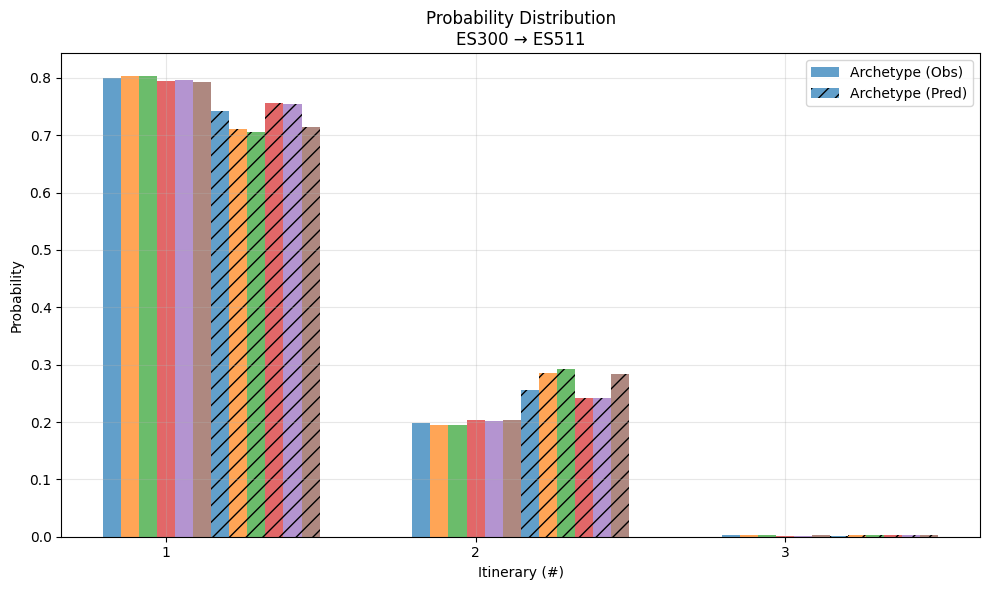

In [77]:
plot_probs("ES300", "ES511", paths_prob_observed, paths_prob)

In [78]:
trips_logit[(trips_logit["origin"]=="ES300")&(trips_logit["destination"]=="ES511")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
8,ES300,ES511,"['007160000', '007171801']",6361.680,4325.017695,280.996369,409.739139,410.587811,420.376248,499.745738,224.17,52.96,14.56,1,7964.988,5411.807902,0.799182,349.995113,0.802858,510.221689,0.803061,516.65127,0.794710,528.215413,0.795842,629.835613,0.793454
9,ES300,ES511,"['LEMD', 'LEBL']",1586.100,1074.899004,68.168852,99.262846,105.183455,106.875102,128.666741,263.62,136.23,43.55,2,7964.988,5411.807902,0.198621,349.995113,0.194771,510.221689,0.194548,516.65127,0.203587,528.215413,0.202332,629.835613,0.204286
7,ES300,ES511,"['007117000', '007171801']",17.208,11.891204,0.829892,1.219704,0.880004,0.964062,1.423134,630.00,52.71,14.49,3,7964.988,5411.807902,0.002197,349.995113,0.002371,510.221689,0.002391,516.65127,0.001703,528.215413,0.001825,629.835613,0.002260


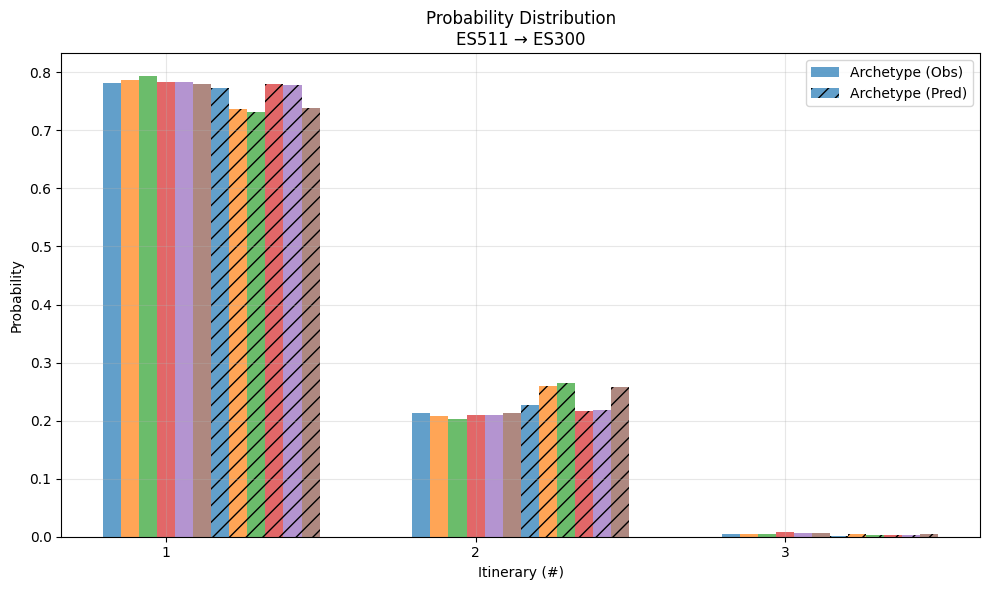

In [79]:
plot_probs("ES511", "ES300", paths_prob_observed, paths_prob)

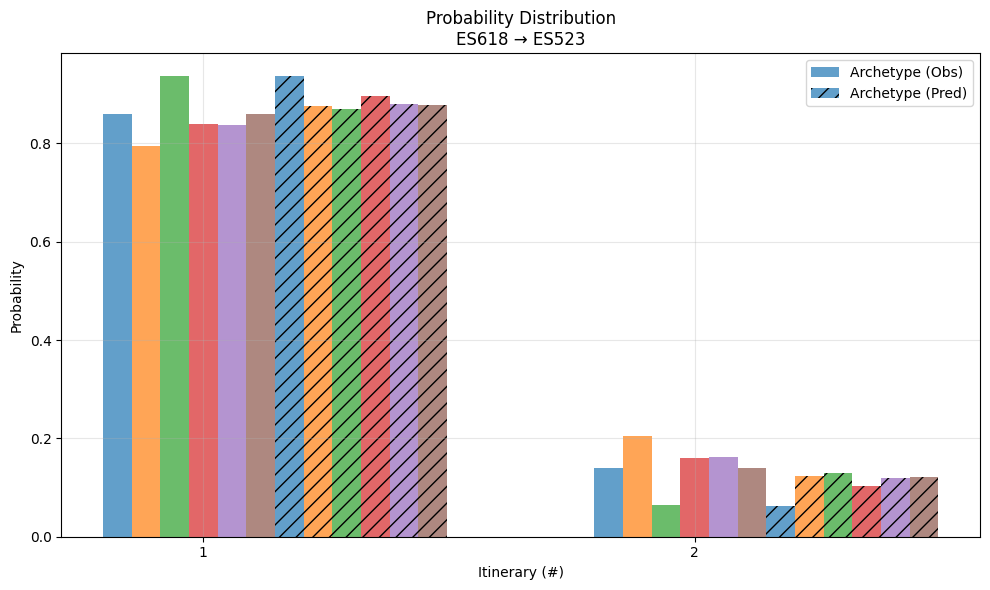

In [80]:
plot_probs("ES618", "ES523", paths_prob_observed, paths_prob)

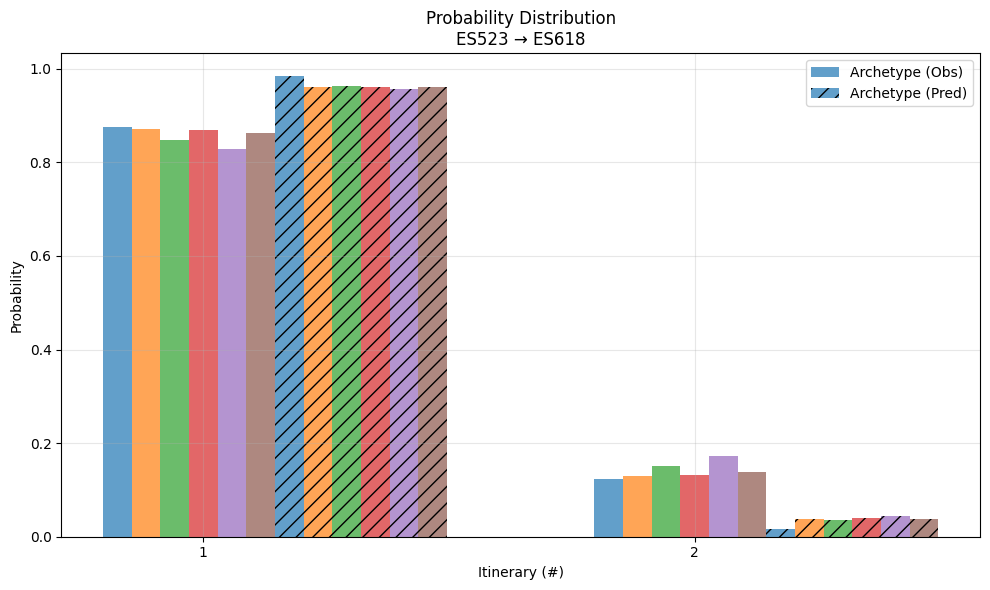

In [81]:
plot_probs("ES523", "ES618", paths_prob_observed, paths_prob)

In [82]:
trips_logit[(trips_logit["origin"]=="ES523")&(trips_logit["destination"]=="ES618")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
21,ES523,ES618,"['LEVC', 'LEZL']",250.481,166.724422,6.657010,3.791338,27.504980,17.038417,28.764834,254.0,140.27,44.66,1,288.038,190.302993,0.8761,7.641182,0.871202,4.468519,0.848455,31.665507,0.86861,20.573993,0.828153,33.385807,0.861589
20,ES523,ES618,"['007165000', '007151003']",37.557,23.578571,0.984173,0.677181,4.160527,3.535576,4.620972,524.0,56.91,15.64,2,288.038,190.302993,0.1239,7.641182,0.128798,4.468519,0.151545,31.665507,0.13139,20.573993,0.171847,33.385807,0.138411


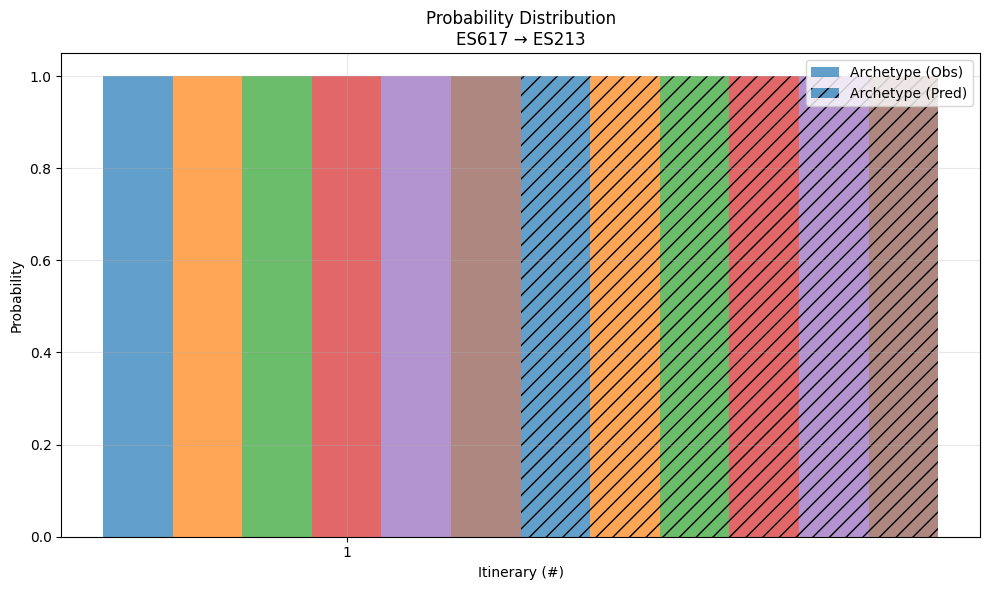

In [83]:
plot_probs("ES617", "ES213", paths_prob_observed, paths_prob)

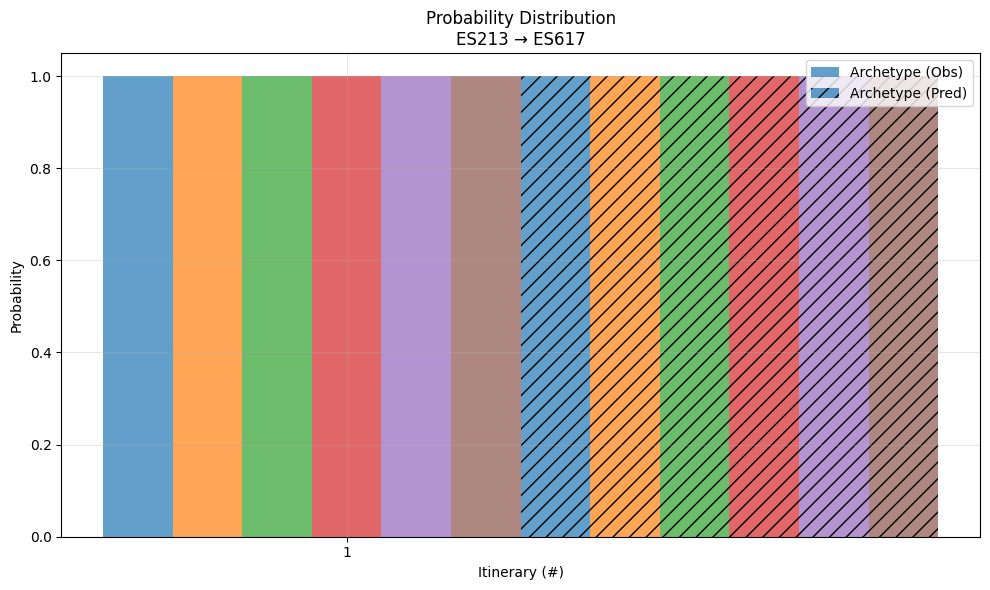

In [84]:
plot_probs("ES213", "ES617", paths_prob_observed, paths_prob)

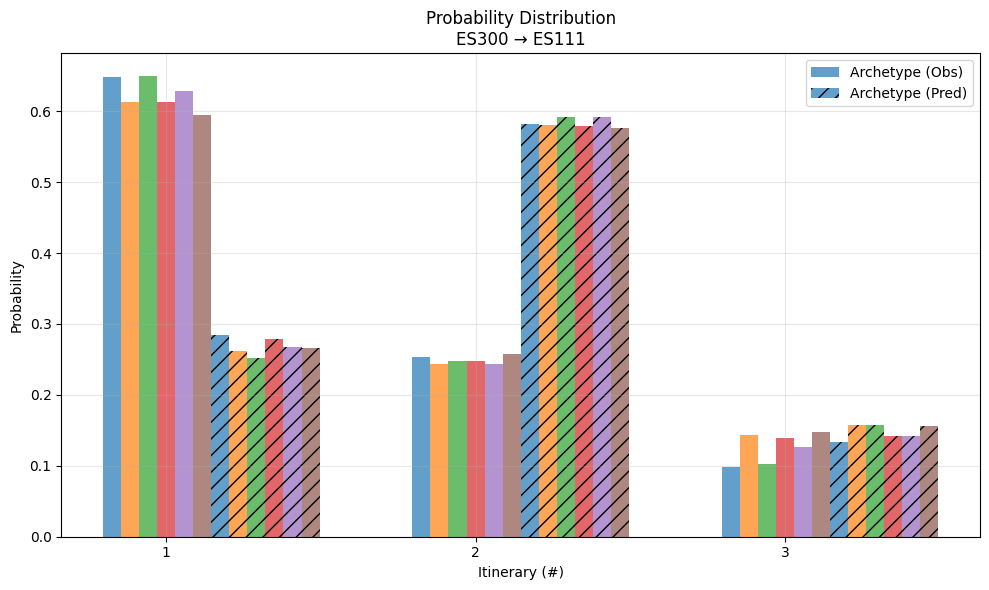

In [85]:
plot_probs("ES300", "ES111", paths_prob_observed, paths_prob)

In [86]:
trips_logit[(trips_logit["origin"]=="ES300")&(trips_logit["destination"]=="ES111")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
5,ES300,ES111,"['LEMD', 'LECO']",659.929,470.880808,19.605455,20.294452,61.161654,39.407437,48.579193,252.00,138.57,67.66,1,1033.876,726.478865,0.648169,31.966573,0.613311,31.254411,0.649331,99.811103,0.612774,62.668813,0.628821,81.696236,0.594632
4,ES300,ES111,"['007117000', '007131400']",260.524,183.892799,7.791793,7.750854,24.735964,15.300630,21.051961,297.00,51.07,14.04,2,1033.876,726.478865,0.253129,31.966573,0.243748,31.254411,0.247992,99.811103,0.247828,62.668813,0.244151,81.696236,0.257686
6,ES300,ES111,"['LEMD', 'LEVX']",113.423,71.705258,4.569324,3.209105,13.913485,7.960746,12.065082,329.11,134.33,55.14,3,1033.876,726.478865,0.098702,31.966573,0.142941,31.254411,0.102677,99.811103,0.139398,62.668813,0.127029,81.696236,0.147682


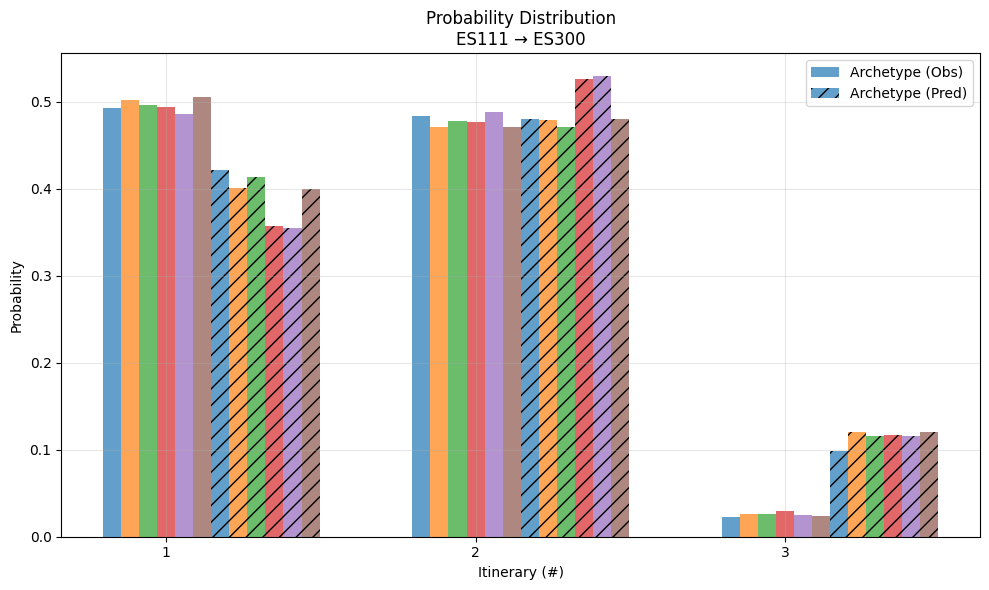

In [87]:
plot_probs("ES111", "ES300", paths_prob_observed, paths_prob)

In [88]:
trips_logit[(trips_logit["origin"]=="ES111")&(trips_logit["destination"]=="ES300")]


,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
1,ES111,ES300,"['LEST', 'LEMD']",390.686,261.142012,10.348502,10.057152,40.513245,35.858625,32.766464,279.33,136.23,41.43,1,791.396,529.976849,0.492742,20.598751,0.502385,20.284497,0.495805,81.959229,0.494310,73.71047,0.486479,64.866203,0.505139
0,ES111,ES300,"['007131400', '007117000']",381.581,256.554111,9.713529,9.696665,39.045852,35.986257,30.584586,291.00,51.07,14.04,2,791.396,529.976849,0.484086,20.598751,0.471559,20.284497,0.478033,81.959229,0.476406,73.71047,0.488211,64.866203,0.471503
2,ES111,ES300,"['LEVX', 'LEMD']",19.129,12.280726,0.536721,0.530680,2.400132,1.865587,1.515154,332.50,134.33,54.06,3,791.396,529.976849,0.023172,20.598751,0.026056,20.284497,0.026162,81.959229,0.029284,73.71047,0.025310,64.866203,0.023358


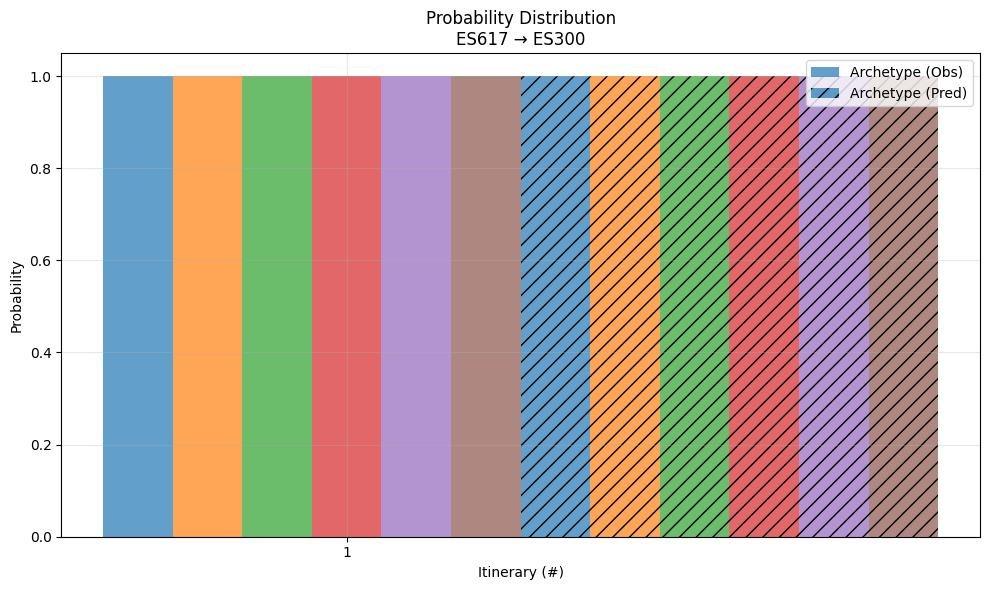

In [89]:
plot_probs("ES617", "ES300", paths_prob_observed, paths_prob)

In [90]:
trips_logit[(trips_logit["origin"]=="ES617")&(trips_logit["destination"]=="ES300")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
23,ES617,ES300,"['LEMG', 'LEMD']",508.78,328.857738,14.797151,16.278233,50.499747,67.853788,30.493343,257.0,131.11,64.22,1,508.78,328.857738,1.0,14.797151,1.0,16.278233,1.0,50.499747,1.0,67.853788,1.0,30.493343,1.0


I think the problem here is that the itineraries cluster pareto only have the option of Ronda-Madrid which only few people do 

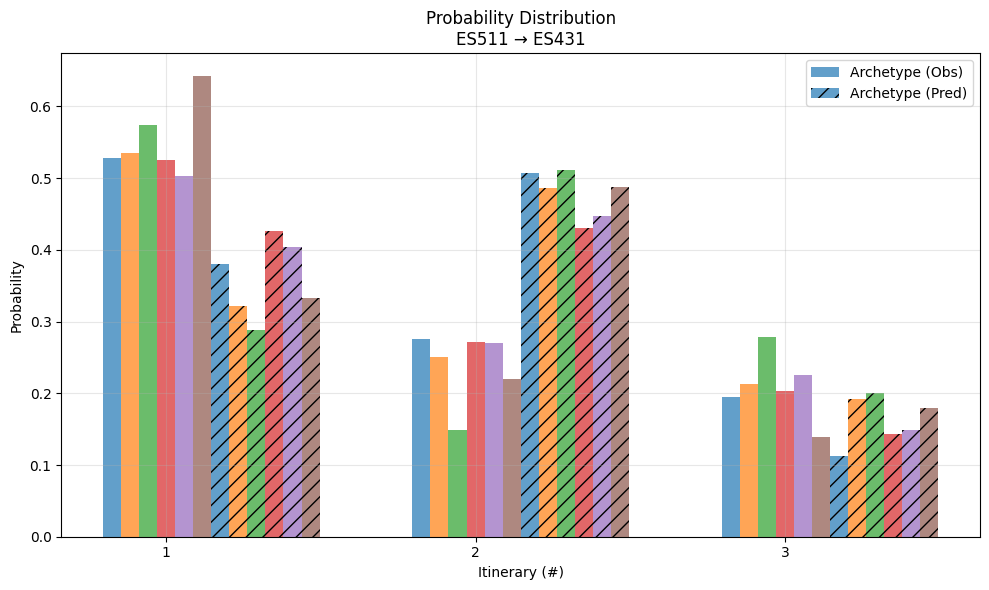

In [91]:
plot_probs("ES511", "ES431", paths_prob_observed, paths_prob)

In [93]:
trips_logit[(trips_logit["origin"]=="ES511")&(trips_logit["destination"]=="ES431")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
17,ES511,ES431,"['LEBL', 'LEBZ']",69.286,40.862252,1.089082,1.690829,15.744660,6.608775,3.290402,323.00,162.70,94.52,1,130.542,77.318693,0.528491,2.03464,0.535270,2.948442,0.573465,29.987164,0.525047,13.129389,0.503357,5.123672,0.642196
19,ES511,ES431,"['LEBL', 'LEZL']",35.127,21.339323,0.511178,0.437144,8.160256,3.555474,1.123624,401.12,163.13,58.07,2,130.542,77.318693,0.275992,2.03464,0.251238,2.948442,0.148263,29.987164,0.272125,13.129389,0.270803,5.123672,0.219301
18,ES511,ES431,"['LEBL', 'LEMD']",26.129,15.117117,0.434380,0.820469,6.082247,2.965140,0.709646,523.62,136.23,43.55,3,130.542,77.318693,0.195517,2.03464,0.213492,2.948442,0.278272,29.987164,0.202828,13.129389,0.225840,5.123672,0.138503


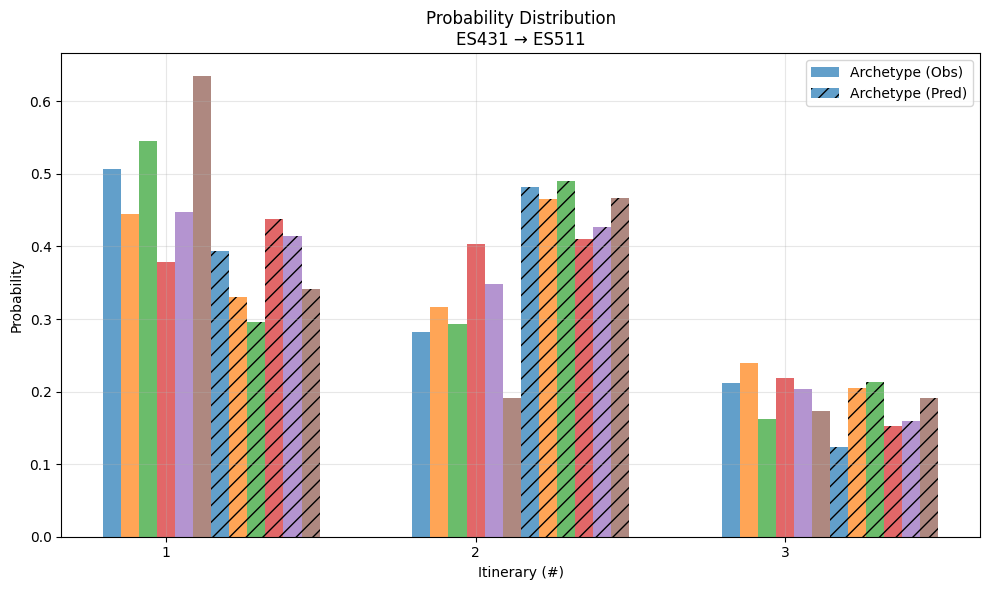

In [92]:
plot_probs("ES431", "ES511", paths_prob_observed, paths_prob)

what happened with Madrid Málaga is that one of the clusters contained two itineraries: train Mad-Ronda and train Mad-Málaga, so I haven't considered it for this second analysis.